<a href="https://colab.research.google.com/github/MasterMSTC/IPTC_DeepLearning/blob/master/IPTC_GoogleColab_Intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# McKinsey Semminar - UPM



* # Import files from your local system (your laptop...)



In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

## Where is the uploaded file?

In [ ]:
ls

In [ ]:
!unrar x -Y bankingchurn_data_modif.rar

In [ ]:
ls

In [4]:
# Import pandas
import pandas as pd

# Read Churn Data
# McK_df = pd.read_csv("bankingchurn_data_modif.csv",sep=';',na_values=['-1'])

data = pd.read_csv("bankingchurn_data_modif.csv",sep=';',decimal=",")

C:\Users\luisa\AppData\Local\Temp\ipykernel_27804\1504021525.py:7: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("bankingchurn_data_modif.csv",sep=';',decimal=",")


In [5]:
data.head(10)

,contract_start,contract_end,date_of_birth,gender,profession,size_household,ZIP,segment,credit_rating,no_credit_rating_flag,...,online_number_of_logins_per_month,online_tranactions_per_month,advisor_contacts_last12months,customer_limit,cash_withdraws_per_month,cash_withdrawals_value,consumer_credit_value,consumer_credit_maturity,account_fee,number_of_refusals
0,2010-10-24,NaN,1991-02-11,M,Professional Services,1,76829,S2,89.568518,0,...,0,0,3,1000.0,4,459.840940,-24011.393552,205,15,6
1,2010-04-30,2017-10-20,1986-04-06,W,NaN,1,35104,S2,94.270507,0,...,16,8,2,1000.0,7,476.334459,-5368.743068,137,15,6
2,2013-05-02,NaN,1993-04-18,M,Transportation,1,63450,S2,93.030947,0,...,26,12,2,1000.0,3,332.640202,-9678.713419,624,15,4
3,2016-12-24,NaN,1994-07-29,W,Professional Services,2,9573,S3,NaN,1,...,0,0,4,1050.0,4,378.324744,-12110.305916,1263,10,7
4,2011-10-01,NaN,1990-10-28,W,Research,1,66916,S2,90.457664,0,...,23,18,3,1000.0,4,471.509299,0.000000,521,10,3
5,2004-09-24,NaN,1987-11-18,M,Real Estate,1,14728,S2,NaN,1,...,34,22,4,1000.0,3,478.179202,0.000000,0,0,10
6,2015-12-20,NaN,1992-06-30,M,Engineering,2,95666,S2,NaN,1,...,19,10,4,1850.0,4,588.621471,0.000000,1498,15,0
7,2016-07-15,NaN,1995-07-20,W,NaN,2,67819,S3,NaN,1,...,6,1,0,1600.0,4,635.546935,0.000000,686,20,5
8,2004-04-17,NaN,1984-03-11,M,Maint,2,73113,S2,96.614939,0,...,13,8,2,2650.0,5,484.351736,-4880.287513,133,20,5
9,2015-06-18,NaN,1984-03-18,M,Consultant,1,31717,S2,92.023242,0,...,0,0,3,1000.0,4,49.569835,-19610.275365,58,0,7


In [6]:
data.columns

Index(['contract_start', 'contract_end', 'date_of_birth', 'gender',
       'profession', 'size_household', 'ZIP', 'segment', 'credit_rating',
       'no_credit_rating_flag', 'main_account_flag', 'online_banking_flag',
       'tele_banking_flag', 'creditcard_flag', 'insurance_life_flag',
       'insurance_house_flag', 'insurance_car_flag', 'insurance_other_flag',
       'mortgage_flag', 'portfolio_flag', 'last_balance',
       'last_balance_minus_6_months', 'last_balance_minus_12_months',
       'income_salary_per_year', 'income_deposits_per_year',
       'income_securities_per_year', 'insurance_life_premium_per_month',
       'insurance_house_premium_per_year', 'insurance_car_premium_per_year',
       'mortgage_value', 'mortgage_interest', 'mortgage_downpayment',
       'mortgage_dayuntilmaturity', 'mortgage_numbers',
       'online_number_of_logins_per_month', 'online_tranactions_per_month',
       'advisor_contacts_last12months', 'customer_limit',
       'cash_withdraws_per_month', '

In [7]:
data['online_number_of_logins_per_month']

0         0
1        16
2        26
3         0
4        23
         ..
99995     0
99996     0
99997     3
99998    31
99999    19
Name: online_number_of_logins_per_month, Length: 100000, dtype: int64

In [8]:
data.dtypes

contract_start                        object
contract_end                          object
date_of_birth                         object
gender                                object
profession                            object
size_household                         int64
ZIP                                   object
segment                               object
credit_rating                        float64
no_credit_rating_flag                  int64
main_account_flag                      int64
online_banking_flag                    int64
tele_banking_flag                      int64
creditcard_flag                        int64
insurance_life_flag                    int64
insurance_house_flag                   int64
insurance_car_flag                     int64
insurance_other_flag                   int64
mortgage_flag                          int64
portfolio_flag                         int64
last_balance                         float64
last_balance_minus_6_months          float64
last_balan

In [9]:
data['contract_start'] = pd.to_datetime(data['contract_start'])
data['contract_end'] = pd.to_datetime(data['contract_end'])
data['date_of_birth'] = pd.to_datetime(data['date_of_birth'])

In [10]:
data.dtypes

contract_start                       datetime64[ns]
contract_end                         datetime64[ns]
date_of_birth                        datetime64[ns]
gender                                       object
profession                                   object
size_household                                int64
ZIP                                          object
segment                                      object
credit_rating                               float64
no_credit_rating_flag                         int64
main_account_flag                             int64
online_banking_flag                           int64
tele_banking_flag                             int64
creditcard_flag                               int64
insurance_life_flag                           int64
insurance_house_flag                          int64
insurance_car_flag                            int64
insurance_other_flag                          int64
mortgage_flag                                 int64
portfolio_fl

In [11]:
data['contract_end'][0:20]

0           NaT
1    2017-10-20
2           NaT
3           NaT
4           NaT
5           NaT
6           NaT
7           NaT
8           NaT
9           NaT
10          NaT
11   2017-06-29
12          NaT
13          NaT
14          NaT
15          NaT
16          NaT
17          NaT
18          NaT
19          NaT
Name: contract_end, dtype: datetime64[ns]

In [12]:
data['contract_end'][0:20] < "2021-09-11"

0     False
1      True
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11     True
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
Name: contract_end, dtype: bool

In [13]:
data['churn'] = (data['contract_end'] < "2021-09-15").astype(int)

In [14]:
pd.Categorical(data['churn']).describe()

,counts,freqs
categories,,
0,95129,0.95129
1,4871,0.04871


In [15]:
data.head(10)

,contract_start,contract_end,date_of_birth,gender,profession,size_household,ZIP,segment,credit_rating,no_credit_rating_flag,...,online_tranactions_per_month,advisor_contacts_last12months,customer_limit,cash_withdraws_per_month,cash_withdrawals_value,consumer_credit_value,consumer_credit_maturity,account_fee,number_of_refusals,churn
0,2010-10-24,NaT,1991-02-11,M,Professional Services,1,76829,S2,89.568518,0,...,0,3,1000.0,4,459.840940,-24011.393552,205,15,6,0
1,2010-04-30,2017-10-20,1986-04-06,W,NaN,1,35104,S2,94.270507,0,...,8,2,1000.0,7,476.334459,-5368.743068,137,15,6,1
2,2013-05-02,NaT,1993-04-18,M,Transportation,1,63450,S2,93.030947,0,...,12,2,1000.0,3,332.640202,-9678.713419,624,15,4,0
3,2016-12-24,NaT,1994-07-29,W,Professional Services,2,9573,S3,NaN,1,...,0,4,1050.0,4,378.324744,-12110.305916,1263,10,7,0
4,2011-10-01,NaT,1990-10-28,W,Research,1,66916,S2,90.457664,0,...,18,3,1000.0,4,471.509299,0.000000,521,10,3,0
5,2004-09-24,NaT,1987-11-18,M,Real Estate,1,14728,S2,NaN,1,...,22,4,1000.0,3,478.179202,0.000000,0,0,10,0
6,2015-12-20,NaT,1992-06-30,M,Engineering,2,95666,S2,NaN,1,...,10,4,1850.0,4,588.621471,0.000000,1498,15,0,0
7,2016-07-15,NaT,1995-07-20,W,NaN,2,67819,S3,NaN,1,...,1,0,1600.0,4,635.546935,0.000000,686,20,5,0
8,2004-04-17,NaT,1984-03-11,M,Maint,2,73113,S2,96.614939,0,...,8,2,2650.0,5,484.351736,-4880.287513,133,20,5,0
9,2015-06-18,NaT,1984-03-18,M,Consultant,1,31717,S2,92.023242,0,...,0,3,1000.0,4,49.569835,-19610.275365,58,0,7,0


<Axes: >

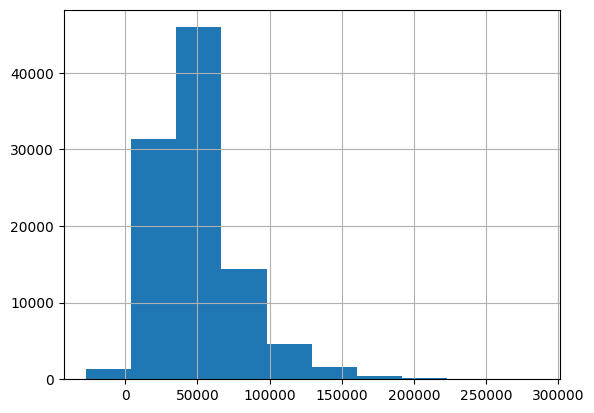

In [16]:
data['last_balance'].hist()

array([<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
      dtype=object)

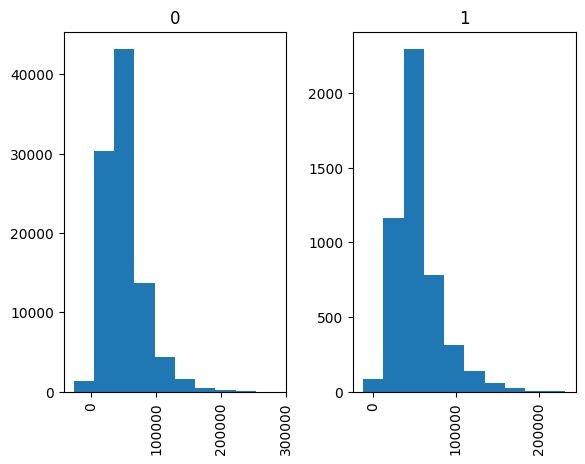

In [17]:
data['last_balance'].hist(by=data['churn'])

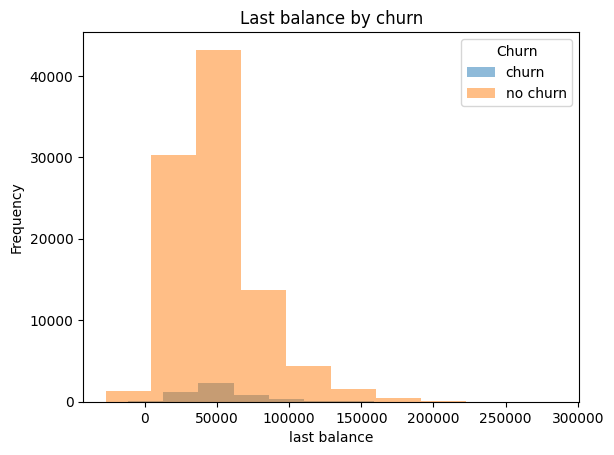

In [18]:
import matplotlib.pyplot as plt

#define two Series with last_balance values by group churn_last_balance / no_churn_last_balance
churn_last_balance = data.loc[data['churn'] == 1, 'last_balance']
no_churn_last_balance = data.loc[data['churn'] == 0, 'last_balance']

#add two histograms to one plot
plt.hist(churn_last_balance, alpha=0.5, label='churn')
plt.hist(no_churn_last_balance, alpha=0.5, label='no churn')

#add plot title and axis labels
plt.title('Last balance by churn')
plt.xlabel('last balance')
plt.ylabel('Frequency')

#add legend
plt.legend(title='Churn')

#display plot
plt.show()



# ... now you can think or imagine new features useful to predict churn
# Feature Engineering

## Visualize NA

[A library to visualize NA](https://www.geeksforgeeks.org/python-visualize-missing-values-nan-values-using-missingno-library/)

In [19]:
import missingno as msno

import matplotlib.pyplot as plt
%matplotlib inline

# Visualize missing values as a matrix
msno.matrix(data)

ModuleNotFoundError: No module named 'missingno'


---

---

# Now you can try to train some ML models for Churn prediction



* The outcome will be churn true (1) or false (0)

In [20]:
import numpy as np

y = np.array(data['churn'])

* ## select some features (or predictors) from columns

In [21]:
all_columns = data.columns
print(all_columns)

Index(['contract_start', 'contract_end', 'date_of_birth', 'gender',
       'profession', 'size_household', 'ZIP', 'segment', 'credit_rating',
       'no_credit_rating_flag', 'main_account_flag', 'online_banking_flag',
       'tele_banking_flag', 'creditcard_flag', 'insurance_life_flag',
       'insurance_house_flag', 'insurance_car_flag', 'insurance_other_flag',
       'mortgage_flag', 'portfolio_flag', 'last_balance',
       'last_balance_minus_6_months', 'last_balance_minus_12_months',
       'income_salary_per_year', 'income_deposits_per_year',
       'income_securities_per_year', 'insurance_life_premium_per_month',
       'insurance_house_premium_per_year', 'insurance_car_premium_per_year',
       'mortgage_value', 'mortgage_interest', 'mortgage_downpayment',
       'mortgage_dayuntilmaturity', 'mortgage_numbers',
       'online_number_of_logins_per_month', 'online_tranactions_per_month',
       'advisor_contacts_last12months', 'customer_limit',
       'cash_withdraws_per_month', '

In [22]:
all_columns[20:44]

Index(['last_balance', 'last_balance_minus_6_months',
       'last_balance_minus_12_months', 'income_salary_per_year',
       'income_deposits_per_year', 'income_securities_per_year',
       'insurance_life_premium_per_month', 'insurance_house_premium_per_year',
       'insurance_car_premium_per_year', 'mortgage_value', 'mortgage_interest',
       'mortgage_downpayment', 'mortgage_dayuntilmaturity', 'mortgage_numbers',
       'online_number_of_logins_per_month', 'online_tranactions_per_month',
       'advisor_contacts_last12months', 'customer_limit',
       'cash_withdraws_per_month', 'cash_withdrawals_value',
       'consumer_credit_value', 'consumer_credit_maturity', 'account_fee',
       'number_of_refusals'],
      dtype='object')

In [23]:
# Select features in X


X = np.array(data[all_columns[20:44]])

* ## Split train / test data

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)

In [26]:
print('Training data cases: ', len(X_train), ' Test data cases: ', len(X_test))

Training data cases:  85000  Test data cases:  15000


* # We will start using <font color = magenta>**Logistic Regression**</font> in  [Scikit Learn Package](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)




In [27]:
from sklearn.linear_model import LogisticRegression

# Note the parameters (hiperparameters) you must consider

In [28]:
model = LogisticRegression()
model.fit(X_train, y_train)

D:\ANACONDA\Anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [29]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(X_train)

X_scaled = scaler.transform(X_train)

In [30]:
model.fit(X_scaled, y_train)

LogisticRegression()

# Now that the model is trained we can predict some cases:

In [31]:
X_test_scaled = scaler.transform(X_test)

y_pred = model.predict(X_test_scaled)

In [32]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

# Compare Predictions with True values

In [33]:
y_pred[0:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [34]:
y_test[0:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

# You can also get the "probabilities" for each prediction for each class

In [35]:
y_pred_proba = model.predict_proba(X_test_scaled)

In [36]:
# Two values: prob of "0" (Healthy) prob of "1" Severe (add up 1!)

y_pred_proba[0:4]

array([[0.97573512, 0.02426488],
       [0.98929464, 0.01070536],
       [0.97685509, 0.02314491],
       [0.99535515, 0.00464485]])

# Now you can explore using several evaluation metrics, confussion matrix, etc...

https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics

In [37]:
from sklearn import metrics

In [38]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print('Accuracy Score : ' + str(metrics.accuracy_score(y_test,y_pred)))
print('Precision Score : ' + str(metrics.precision_score(y_test,y_pred)))
print('Recall Score : ' + str(metrics.recall_score(y_test,y_pred)))
print('F1 Score : ' + str(metrics.f1_score(y_test,y_pred)))

Accuracy: 0.9538
Accuracy Score : 0.9538
Precision Score : 0.7068965517241379
Recall Score : 0.05718270571827057
F1 Score : 0.10580645161290322


* # The Confusion Matriz

In [39]:
import matplotlib.pyplot as plt

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

In [40]:
cnf_matrix

array([[14266,    17],
       [  676,    41]], dtype=int64)

Text(0.5, 23.52222222222222, 'Predicted')

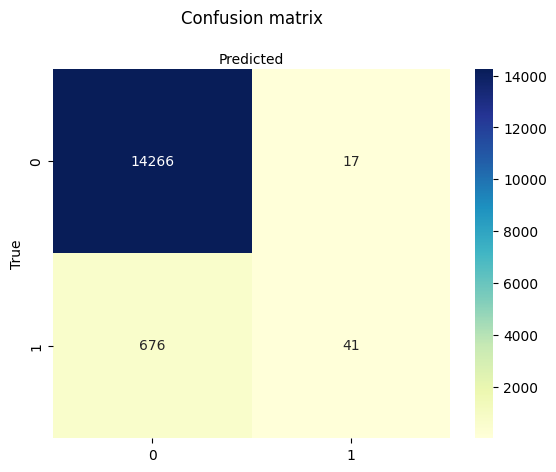

In [41]:
import seaborn as sns

labels = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.title('Confusion matrix', y=1.1)
plt.ylabel('True')
plt.xlabel('Predicted')

# .... now you can try and compare other models.... use hyperparameyters selection etc...

* ## You can follow scikit learn documentation and examples, as this:
  https://scikit-learn.org/stable/auto_examples/exercises/plot_cv_diabetes.html#sphx-glr-auto-examples-exercises-plot-cv-diabetes-py